##Now, that we saw some examples of supervised learning , lets see one example of unsupervised learning. <br>

As we discussed in a previous lesson, here, we just jave the data. We don't know into what we have to segregate the data into. 

For example, an E.T(extra terrestrial) landed on earth. Now he has to segrerate living beings on earth. Now, we cant say that E.T can segregate into animals, plants etc, because even something called 'animals' and 'plants' are new to him. 

SO, basically, he looks for features..  for example, living beings <br>with the ability of locomotion --> animals <br> and <br>without locomotion --> plants.


Here, the machine learning algorithm is E.T and it ends up clustering into groups so that each group is close enough. We dont know how many clusters the model will make w.r.t. a feature. For example, If E.T is to divide based on no of legs, it may go on dividing from a two legged ape to a 8 legged spider to even a millipede. So, we need to tell E.T into how mnay clusters it has to divide. We'll learn a trick to do that as well.

<br><br>
Note - it can even go creating clusters within clusters and finally come to a stage where each individual is a cluster. I.e, E.T can identify each living being with some gigantic set of features. We're not covering that now.  To get a better view of hierachcial clustering, checkout [this](https://www.youtube.com/watch?v=QXOkPvFM6NU) video

Importing dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

###Here, We'll take a dataset of customers in a shopping mall and try to cluster them into groups depending upon their annual income and spending score.

Data Collection & Analysis

In [8]:
# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')

In [10]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


SO now we understood there arent any null objects here.

In [14]:
# checking for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

CustomerID is not helpful to us. SO, we'll get rid of that column

In [15]:
data.drop('CustomerID',axis=1,inplace=True)

In [16]:
# finding the number of rows and columns
data.shape

(200, 4)

In [17]:
#extracting the data from 2nd and 3rd columns (0 based index)  i.e, income and spend scoreince we need that data to plot values.
X = data.iloc[:,[2,3]].values

Renaming cols to our convenience

In [18]:
data.columns=['gender','age','income','spendscore']


Text(0, 0.5, 'Spending score')

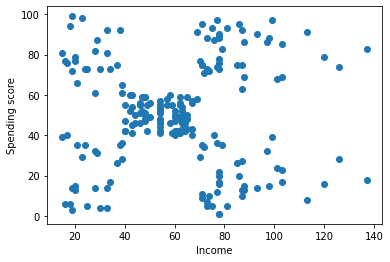

In [19]:
plt.scatter(data.income,data.spendscore,marker='o')
plt.xlabel('Income')
plt.ylabel('Spending score')



*   Here, intuitively we can guess that we can group this into 5 groups. But lets look it scientifically since intuition may not help in some cases 😀
*   We choose a method called WCSS. 



WCSS  ->  Within Clusters Sum of Squares

Here we will give a range of numbers which denote the no of clusters. 

###Before understanding WCSS, lets understand how clustering itself works. I.e, suppose no of clusters = 3 , how are points divided. There are a no of steps.


- **A number of centroids , one for each group (here 3) are plotted. This can be anywhere in the graph**
- **Each point in scatter plot is grouped with the centroid which is nearest to it.**
- **Once a group is formed, its centroid is updated by the good old math formula**

![image](https://d2vlcm61l7u1fs.cloudfront.net/media%2Fa60%2Fa6049e6f-1a55-4f2c-877d-04d0d82a49a4%2FphprueWbi.png)

These steps are repeated until the points stop changing groups

For more clarity checkout [this medium article](https://medium.com/analytics-vidhya/k-means-clustering-simplified-6cff56d12194#:~:text=What%20is%20Clustering%3F,These%20subgroups%20are%20called%20clusters.)

In [21]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

#Here, init='kmeans++' is used to make sure that the randomly selected centroid are far enough.

Now, understanding WCSS is fairly easy. As the name says,it calculates the square of distance of each point to the centroid of its cluster and sums the whole, for each cluster.<br> This value is checked for each number of clusters and we check where the largest drop in the value is coming. Thats the elbow we need!

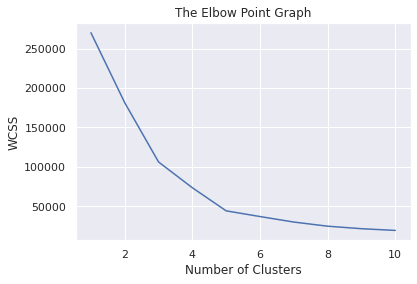

In [22]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)   # we did all this WCSS to give a value to the parameter 'n_clusters'. Phew!

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the Clusters

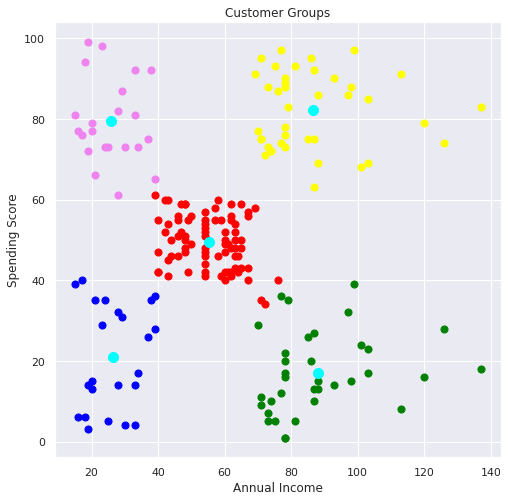

In [24]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#Cool enough!

#Another Cool task:

**[this](https://www.kaggle.com/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo/download) dataset has the data of online selling that happened in Thailand. People posted in Facebook in forms of Links, Photos, Statuses and Video and got many comments, shares, likes, wows, hahas, sads , angrys..  etc**
```
Can YOU sort them into these four groups based on the reactions 😁
